Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  4323
Total IDS in classNo List=  4323
(4323, 32, 32, 3)
(2766, 32, 32, 3)
(865, 32, 32, 3)
(692, 32, 32, 3)
[234, 274, 299, 226, 295, 298, 262, 276, 287, 315]


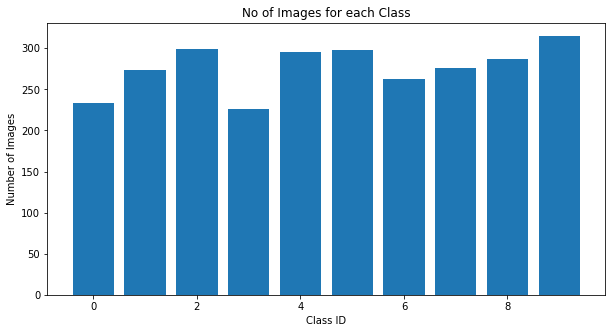

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 30)         

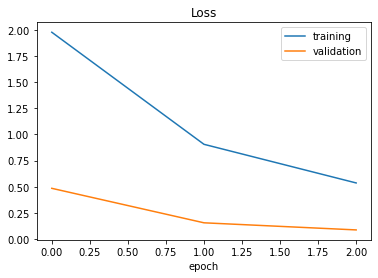

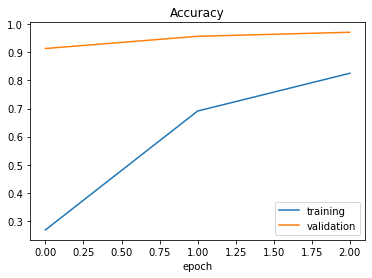

Test Score =  0.09569106996059418
Test Accuracy = 0.973410427570343
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/Jadiel Santos/Desktop/FURB/Python TF\assets


In [5]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
 
################ Parametros ########################
path = "C:/Users/Jadiel Santos/Desktop/FURB/Python TF/Dataset-Digits"
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)
batchSizeVal= 50
epochsVal = 3
stepsPerEpochVal = 50
####################################################

# Importa imagens dos arquivos
count = 0
images = []  # Lista contendo todas as imagens
classNo = [] # Lista contendo todos os ids de classes das imagens
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))
 
# Converte para um numpy array 
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
 
# Divide os dados
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

# Exibe grafico de barra mostrando a distribuição das imagens
numOfSamples= []
for x in range(0,noOfClasses):
    #print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)
 
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

# Função para preprocessar as imagens para treinamento 
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
# img = preProcessing(X_train[30])
# img = cv2.resize(img,(300,300))
# cv2.imshow("PreProcesssed",img)
# cv2.waitKey(0)
 
X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))
 
 
# Reajusta as imagens
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
 
# Aumento da imagem
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
 
# Cria o model 
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2,2)
    noOfNodes= 500
 
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                      imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
 
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
 
model = myModel()
print(model.summary())
 
# Inicia processo de treinamento
history = model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpochVal,
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)
 
# Exibe resultados 
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
 
# Avalia imagens de teste
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])
 
# Salva o model treinado 
pickle_out = open("model_trained_test.p", "wb")
model.save("C:/Users/Jadiel Santos/Desktop/FURB/Python TF")
#pickle.dump(model, pickle_out)
pickle_out.close()

#from threading import Thread 

#def hanlder(modelObj):
#    with open("model_trained_test.pkl", "wb") as file:
#        pickle.dump(modelObj, file)#

#t = Thread(target=hanlder, args=(model))
#t.start()

In [8]:
import numpy as np
import cv2
import pickle
from tensorflow import keras
 
########### PARAMETERS ##############
width = 640
height = 480
threshold = 0.65 # MINIMUM PROBABILITY TO CLASSIFY
cameraNo = 0
#####################################
 
#### CREATE CAMERA OBJECT
cap = cv2.VideoCapture(cameraNo)
cap.set(3,width)
cap.set(4,height)
 
#### LOAD THE TRAINNED MODEL 
#pickle_in = open("saved_model.pb","rb")
model = keras.models.load_model("C:/Users/Jadiel Santos/Desktop/FURB/Python TF")
#model = pickle.load(pickle_in)
 
#### PREPORCESSING FUNCTION
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
 
while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    cv2.imshow("Processsed Image",img)
    img = img.reshape(1,32,32,1)
    #### PREDICT
    classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictions = model.predict(img)
    #print(predictions)
    probVal= np.amax(predictions)
    print(classIndex,probVal)
 
    if probVal> threshold:
        cv2.putText(imgOriginal,str(classIndex) + "   "+str(probVal),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
 
    cv2.imshow("Original Image",imgOriginal)
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0 0.38133395
0 0.3611298
0 0.36063188
0 0.36750832
0 0.3687755
0 0.36388978
0 0.36629978
0 0.36224163
0 0.36224163
0 0.342018
0 0.33084604
0 0.33084604
0 0.31386432
0 0.32286265
0 0.3233942
0 0.3233942
0 0.32942393
0 0.32132867
0 0.3354599
0 0.3354599
0 0.3135104
0 0.33386803
0 0.33386803
0 0.3218108
0 0.32797727
0 0.32922152
0 0.32922152
0 0.3323553
0 0.31497344
0 0.30561662
0 0.30561662
0 0.30396226
0 0.30337927
0 0.30337927
0 0.31450698
0 0.3115142
0 0.31528005
0 0.31528005
0 0.31439966
0 0.33028498
0 0.33028498
0 0.3480147
0 0.37512112
0 0.3870386
0 0.36696678
0 0.37623572
0 0.38301057
0 0.37054846
0 0.37054846
0 0.3519699
0 0.30975127
0 0.29487857
0 0.2

0 0.2683221
0 0.27705234
0 0.2574445
0 0.2574445
0 0.28051552
0 0.28866994
0 0.29428163
0 0.28964823
0 0.28879383
0 0.28879383
0 0.282259
0 0.29602814
0 0.28818396
0 0.28818396
0 0.29546717
0 0.28511164
0 0.29070717
0 0.33375517
0 0.33375517
0 0.32552183
0 0.32008454
0 0.3332154
0 0.3332154
0 0.32527655
0 0.35407934
0 0.32948205
0 0.32948205
0 0.31940323
0 0.3452381
0 0.3452381
0 0.33329672
0 0.34786597
0 0.37189204
0 0.37189204
0 0.38672015
0 0.35939798
0 0.35262132
0 0.36253616
0 0.36253616
0 0.33580992
0 0.3668066
0 0.35901
0 0.36170757
0 0.36170757
0 0.34827843
0 0.35199955
0 0.3439792
0 0.3439792
0 0.33038855
0 0.3389046
0 0.32397112
0 0.32984093
0 0.32984093
0 0.33100745
0 0.3302562
0 0.32443684
0 0.33596924
0 0.36082193
0 0.36082193
0 0.35290623
0 0.35916182
0 0.36611494
0 0.37316105
0 0.37469432
0 0.37469432
0 0.39351693
0 0.31679934
0 0.27310592
0 0.2664354
0 0.26641873
0 0.26641873
0 0.2673538
0 0.26851004
0 0.255965
0 0.255965
0 0.2678173
0 0.2672579
0 0.2638449
0 0.2638449


KeyboardInterrupt: 